In [1]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

rootpath = '/media/share/data/thyroid/'
cancerpath = os.path.join(rootpath, 'thyroid_cancer')
healthypath = os.path.join(rootpath, 'thyroid_healthy')

In [ ]:
subidx = os.listdir(cancerpath)

for subj in subidx:
    midpath = os.path.join(cancerpath, subj)
    dcmidx = os.listdir(midpath)
    pic = 1
    plt.figure()
    for idx in dcmidx:
        dcm = pydicom.dcmread(os.path.join(midpath, idx))
        # check PlanarConfiguration: 0, 1, others
        if dcm.PlanarConfiguration
        if len(dcm.pixel_array.shape) > 3:
            for kpop in dcm.pixel_array:
                img = kpop
                plt.subplot(3, len(dcmidx), pic)
                pic += 1
                plt.title(subj)
                plt.imshow(img)
        else:
            if 
            img = dcm.pixel_array
            plt.subplot(2, len(dcmidx), pic)
            pic += 1
            plt.title(subj)
            plt.imshow(img)

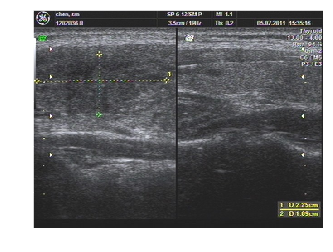

In [2]:
path00 = os.path.join(cancerpath, '12020368_A865283')
file00 = os.listdir(path00)
dcm = pydicom.dcmread(os.path.join(path00, file00[0]))
img = dcm.pixel_array
img = np.transpose(dcm.pixel_array, (2, 0, 1)).reshape(dcm.Rows, dcm.Columns, dcm.SamplesPerPixel)
plt.imshow(img)

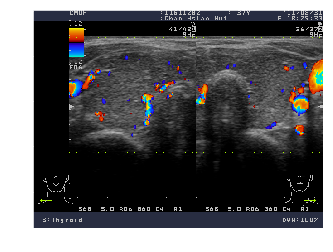

In [3]:
path00 = os.path.join(cancerpath, '11611282_A866408')
file00 = os.listdir(path00)
dcm = pydicom.dcmread(os.path.join(path00, file00[1]))
img = dcm.pixel_array
plt.imshow(img)

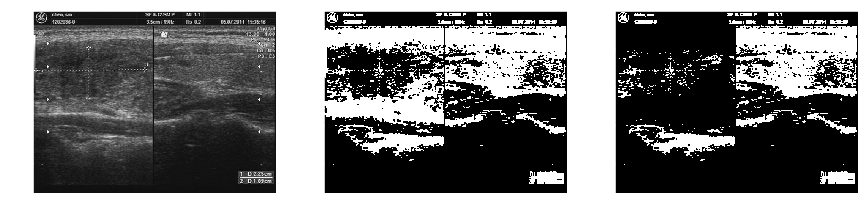

In [3]:
from skimage import filters
from skimage.color import rgb2gray
from skimage import morphology
from skimage.segmentation import clear_border
plt.figure(figsize=(20, 20))

plt.subplot(141)
im = rgb2gray(img)
plt.imshow(im, cmap='gray')

plt.subplot(142)
thresh = filters.threshold_otsu(im)
bw = morphology.closing(im > thresh, morphology.square(3))
plt.imshow(bw, cmap='gray')

plt.subplot(143)
cleared = clear_border(bw)
plt.imshow(cleared, cmap='gray')
# edges1 = filters.prewitt(im)
# plt.imshow(edges1, cmap='gray')
# plt.subplot(143)
# edges2 = morphology.remove_small_objects(edges1, min_size=4)
# plt.imshow(edges2, cmap='gray')
# plt.subplot(144)
# obj1 = morphology.dilation(edges2, morphology.square(7))
# plt.imshow(obj1, cmap='gray')

# edges2= np.subtract(im, edges1)
# plt.imshow(edges2, cmap='gray')


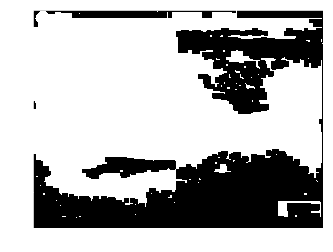

In [13]:
step1 = im * ~cleared
step2 = filters.threshold_otsu(step1)
step3 = morphology.closing(step1 > step2, morphology.square(10))
# step6 = morphology.dilation(step3)

from scipy.ndimage.morphology import binary_fill_holes
step4 = binary_fill_holes(step3)
plt.imshow(step4, cmap='gray')

In [14]:
from skimage.measure import label, regionprops
label_img = label(step4)

for region in regionprops(label_img):
    # take regions with large enough areas
    if region.area >= 128*128:
        minr, minc, maxr, maxc = region.bbox
#         plt.imshow(region)

In [33]:
bbarea = []
for region in regionprops(label_img):
    bbarea.append(region.area)

minr, minc, maxr, maxc = regionprops(label_img)[bbarea.index(np.max(bbarea))].bbox

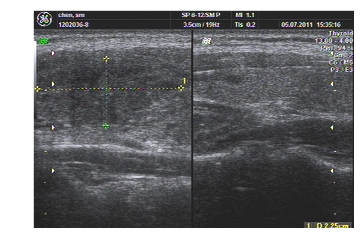

In [34]:
from skimage.util import crop

plt.imshow(img[minr:maxr, minc:maxc])

In [47]:
from skimage.measure import label, regionprops
from skimage.color import label2rgb
label_image = label(step4)
image_label_overlay = label2rgb(label_image, image=im)

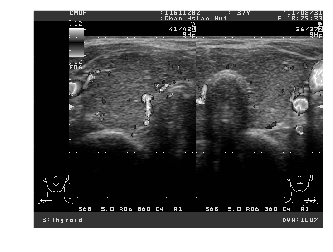

In [11]:
plt.imshow(im - cleared/256, cmap='gray')

In [25]:
area = []
for i in regionprops(label_img):
    area.append(i.area)

lg_area = np.max(area)
lg_area

184572

In [28]:
ix, = np.where(area==184572)
ix

array([], dtype=int64)

In [29]:
area.index(184572)

0

In [31]:
regionprops(label_img)[0].bbox

(0, 0, 433, 639)